In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("C:\\Users\\HP\\Desktop\\saimaharaj\\globalterrorism.csv",encoding = 'latin1')
data.head()

D:\Anaconda\software install\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
data.rename(columns = {'iyear':'Year' , 'imonth':'Month' , 'iday':'Day' , 'gname':'Group' , 'country_txt':'Country' , 'region_txt':'Region' , 'provstate':'State' , 'city':'City' , 'latitude':'Latitude' ,
                       'longitude':'Longitude' , 'summary':'Summary' , 'attacktype1_txt':'AttackType' , 'targtype1_txt':'TargetType' , 'weaptype1_txt':'Weapon' , 'nkill':'Kill' , 'nwound':'Wound'} , inplace = True)

In [5]:
data = data[['Year' , 'Month' , 'Day' , 'Country' , 'State' , 'Region' , 'City' , 'Latitude' , 'Longitude' , 'AttackType' , 'Kill' , 'Wound' , 'target1' , 'Summary' , 'Group' , 'TargetType' , 'Weapon' , 'motive']]

In [6]:
profile=ProfileReport(data,title='Pandas Profiling Report',explorative=True)

In [7]:
profile.to_widgets()

In [8]:
data.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Kill,Wound,target1,Summary,Group,TargetType,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
data['Wound'] = data['Wound'].fillna(0)
data['Kill'] = data['Kill'].fillna(0)
data['Casualities'] = data['Kill'] + data['Wound']

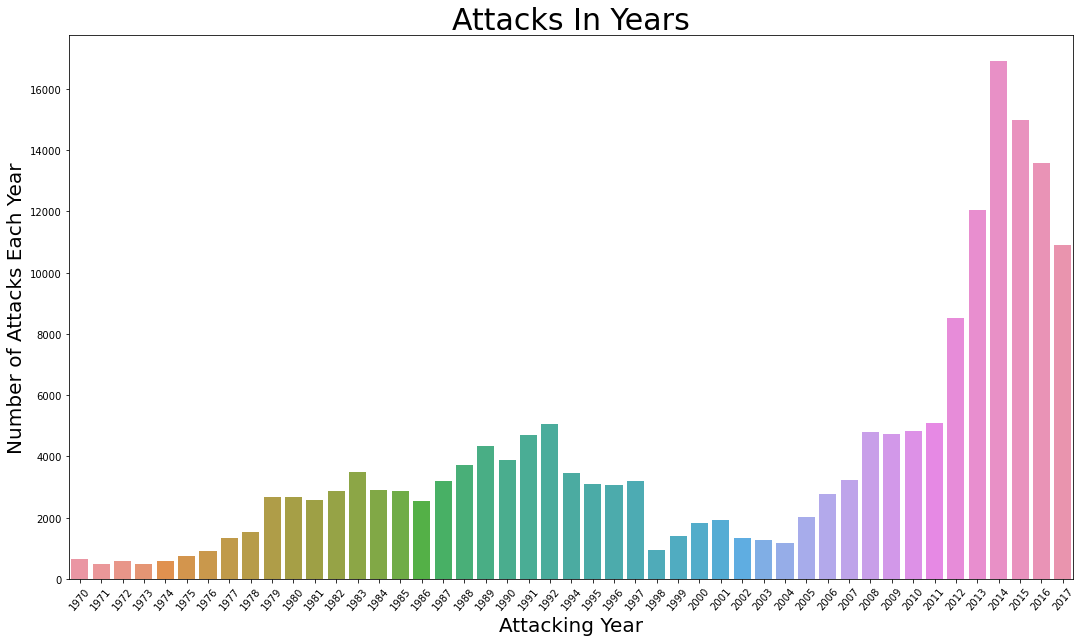

In [10]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year , y = years_count )
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year' , fontsize = 20)
plt.ylabel('Number of Attacks Each Year' , fontsize = 20)
plt.title('Attacks In Years' , fontsize = 30)
plt.show()

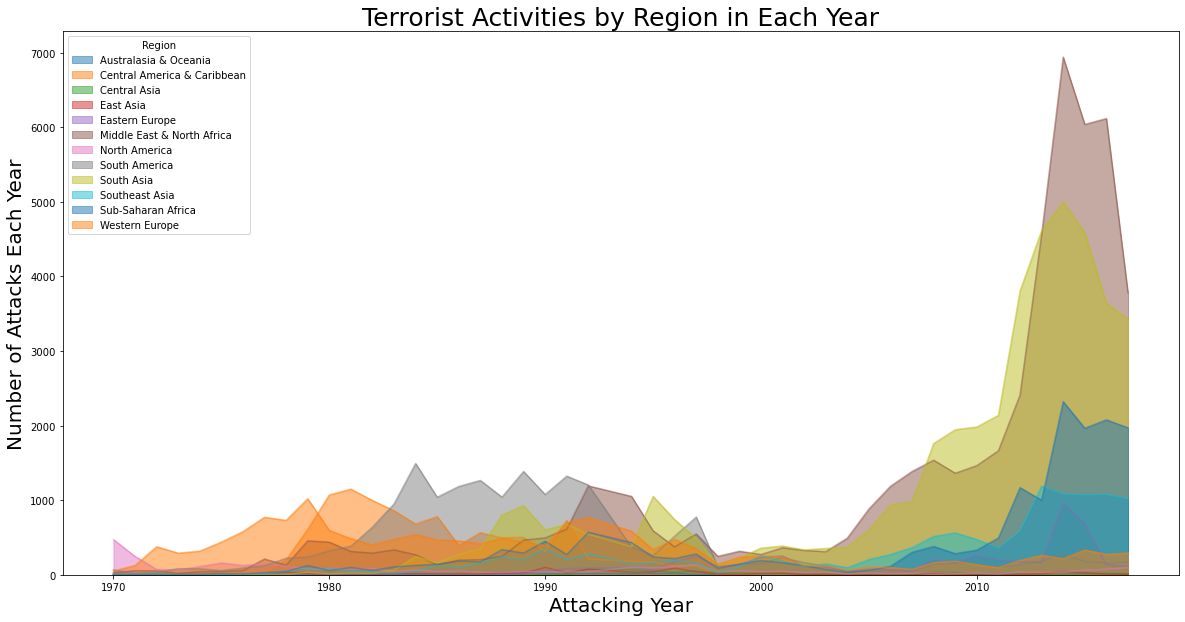

In [11]:
pd.crosstab(data.Year , data.Region).plot(kind = 'area' , stacked = False , figsize = (20,10))
plt.title('Terrorist Activities by Region in Each Year' , fontsize = 25)
plt.ylabel('Number of Attacks Each Year' , fontsize = 20)
plt.xlabel('Attacking Year' , fontsize = 20)
plt.show()

D:\Anaconda\software install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


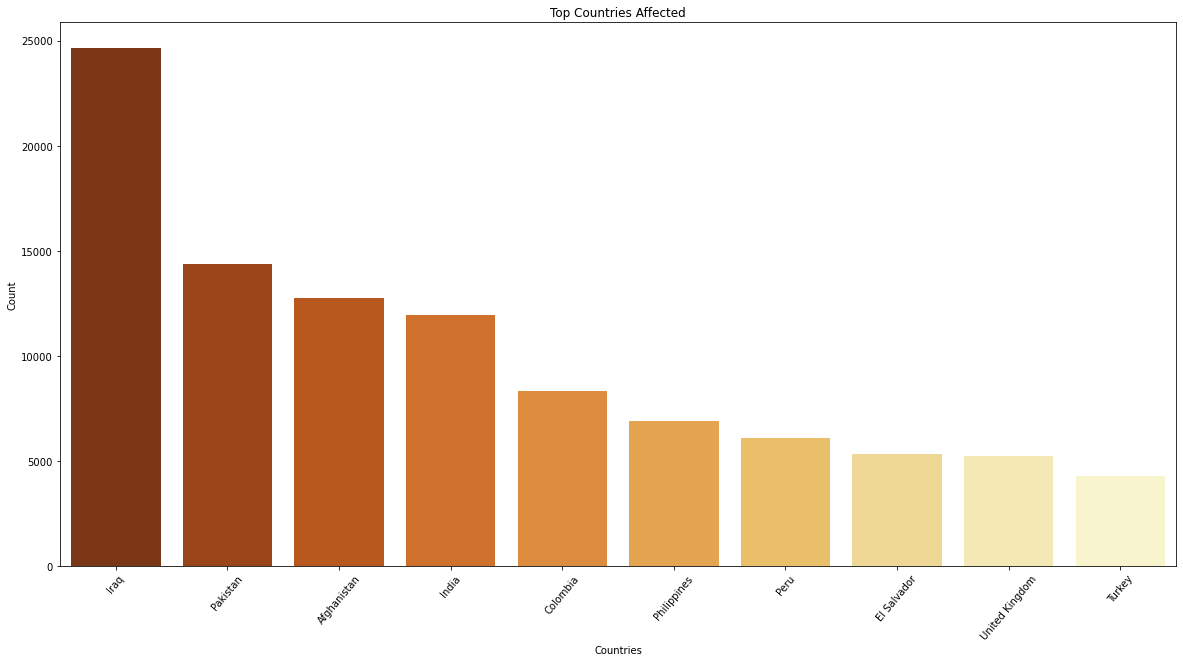

In [12]:
plt.subplots(figsize = (20,10))
sns.barplot(data['Country'].value_counts()[:10].index , data['Country'].value_counts()[:10].values , palette = 'YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

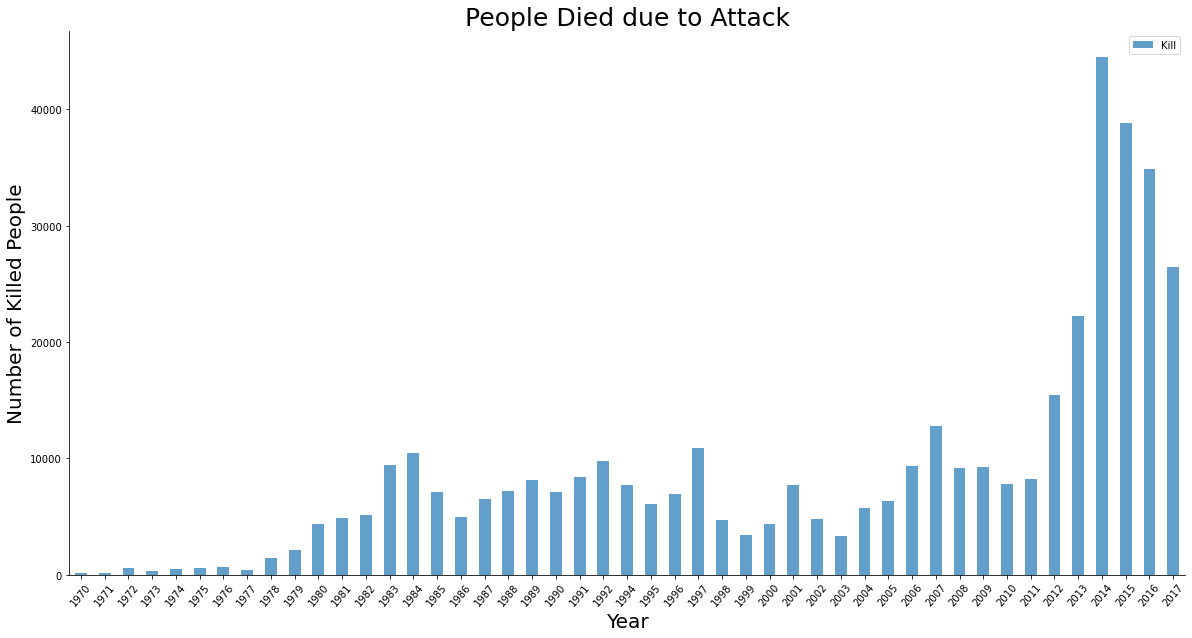

In [13]:
df = data[['Year' , 'Kill']].groupby(['Year']).sum()
fig , ax4 = plt.subplots(figsize = (20,10))
df.plot(kind = 'bar' , alpha = 0.7 , ax = ax4)
plt.xticks(rotation = 50)
plt.title('People Died due to Attack' , fontsize = 25)
plt.ylabel('Number of Killed People' , fontsize = 20)
plt.xlabel('Year' , fontsize = 20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

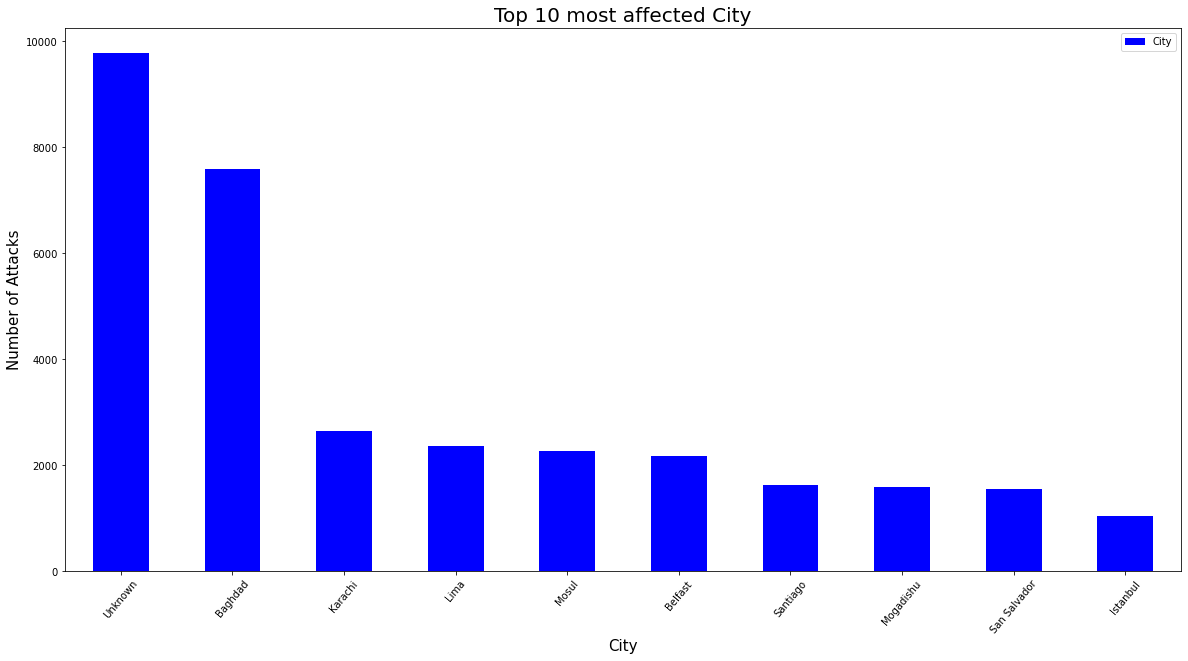

In [14]:
data['City'].value_counts().to_frame().sort_values('City' , axis = 0 , ascending = False).head(10).plot(kind = 'bar' , figsize = (20,10) , color = 'Blue')
plt.xticks(rotation = 50)
plt.xlabel('City' , fontsize = 15)
plt.ylabel('Number of Attacks' , fontsize = 15)
plt.title('Top 10 most affected City' , fontsize = 20)
plt.show()

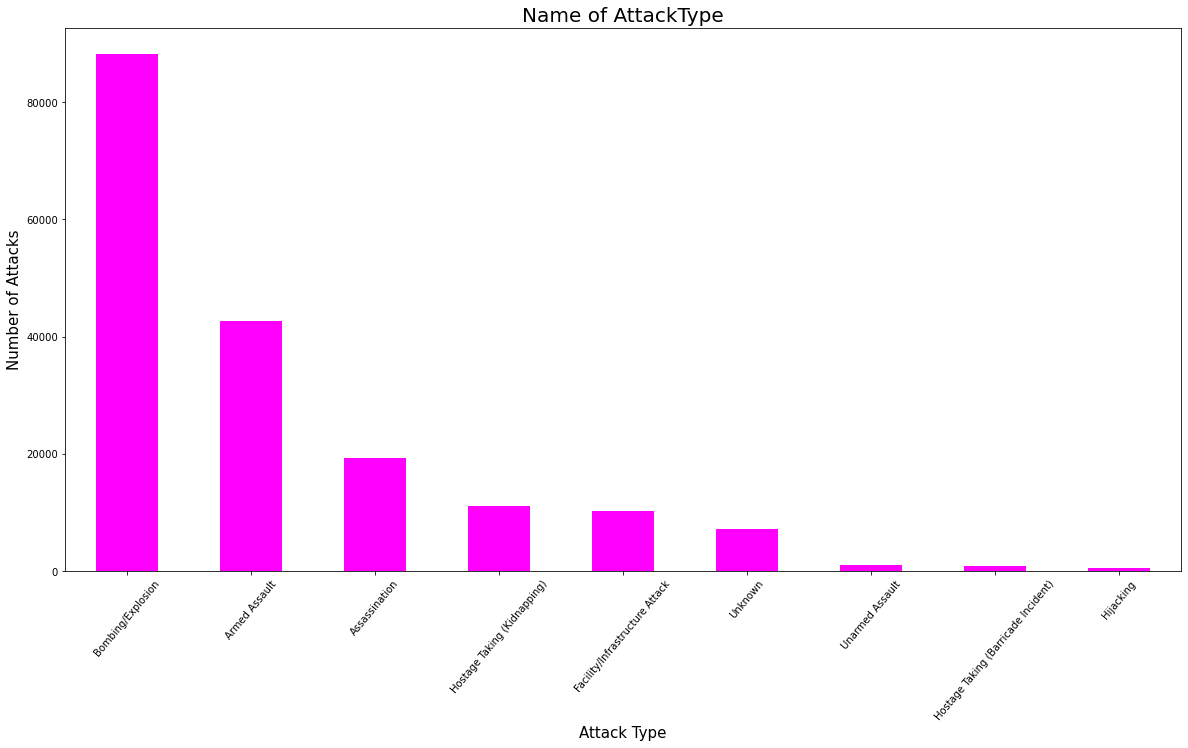

In [15]:
data['AttackType'].value_counts().plot(kind = 'bar' , figsize = (20,10) , color = 'Magenta')
plt.xticks(rotation = 50)
plt.xlabel('Attack Type' , fontsize = 15)
plt.ylabel('Number of Attacks' , fontsize = 15)
plt.title('Name of AttackType' , fontsize = 20)
plt.show()

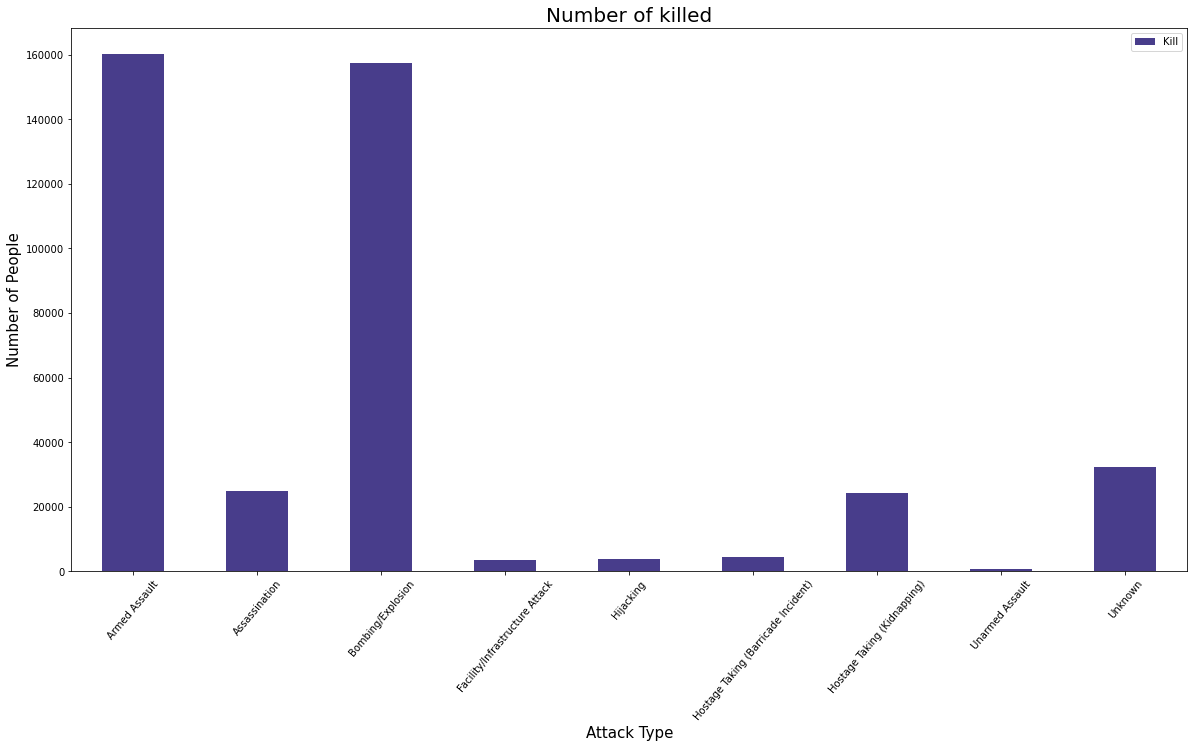

In [16]:
data[['AttackType' , 'Kill']].groupby(["AttackType"] , axis = 0).sum().plot(kind = 'bar' , figsize = (20,10) , color = 'darkslateblue')
plt.xticks(rotation = 50)
plt.xlabel('Attack Type' , fontsize = 15)
plt.ylabel('Number of People' , fontsize = 15)
plt.title('Number of killed' , fontsize = 20)
plt.show()

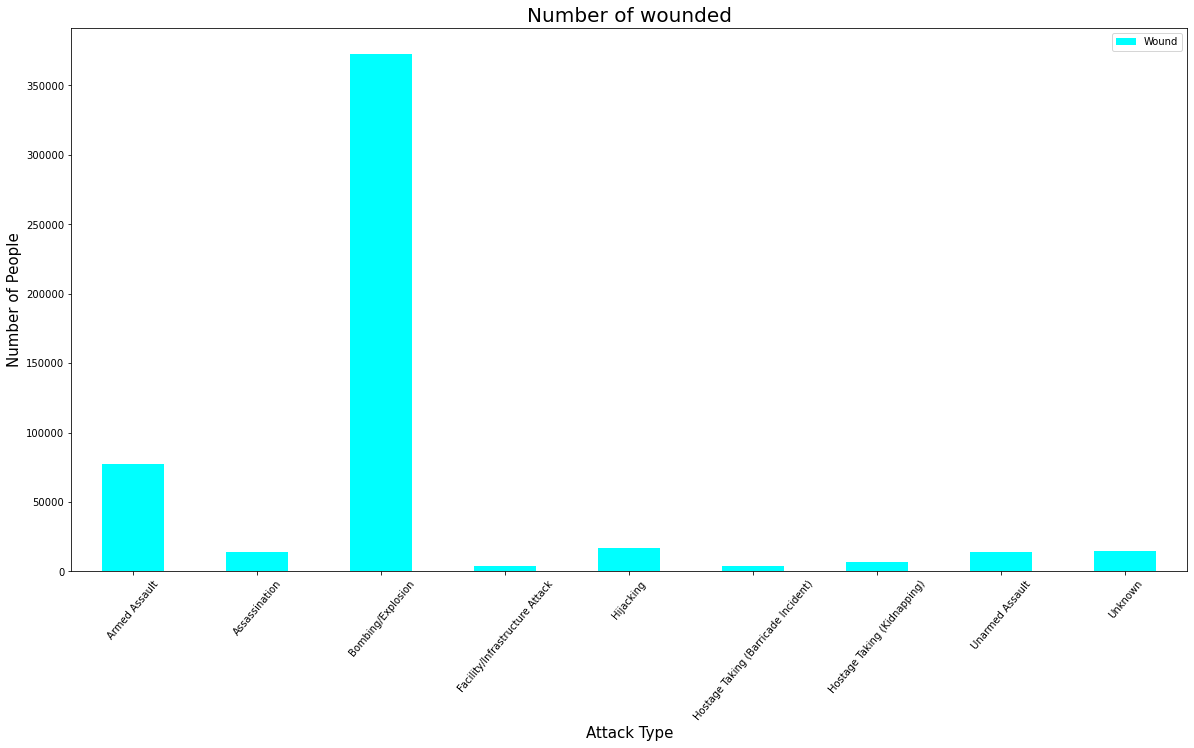

In [17]:
data[['AttackType' , 'Wound']].groupby(["AttackType"] , axis = 0).sum().plot(kind = 'bar' , figsize = (20,10) , color = 'Cyan')
plt.xticks(rotation = 50)
plt.xlabel('Attack Type' , fontsize = 15)
plt.ylabel('Number of People' , fontsize = 15)
plt.title('Number of wounded' , fontsize = 20)
plt.show()

D:\Anaconda\software install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


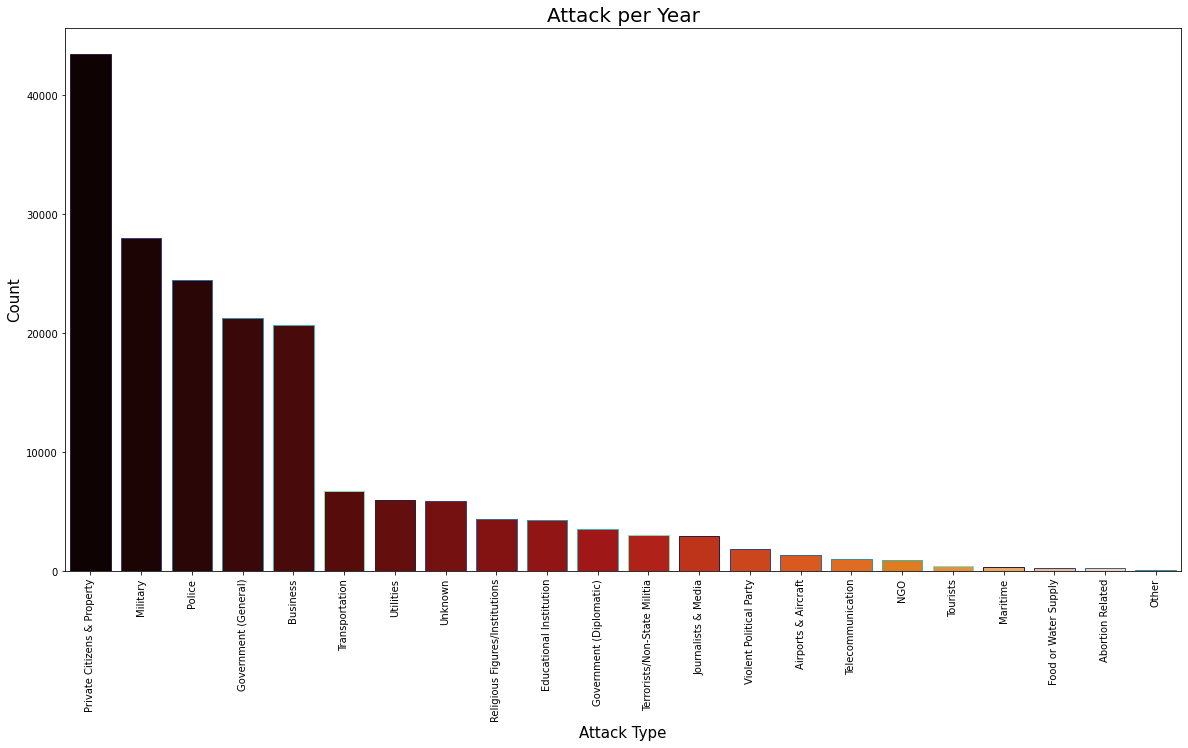

In [18]:
plt.subplots(figsize = (20,10))
sns.countplot(data['TargetType'] , order = data['TargetType'].value_counts().index , palette = 'gist_heat' , edgecolor = sns.color_palette("mako"));
plt.xticks(rotation = 90)
plt.xlabel('Attack Type' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)
plt.title('Attack per Year' , fontsize = 20)
plt.show()

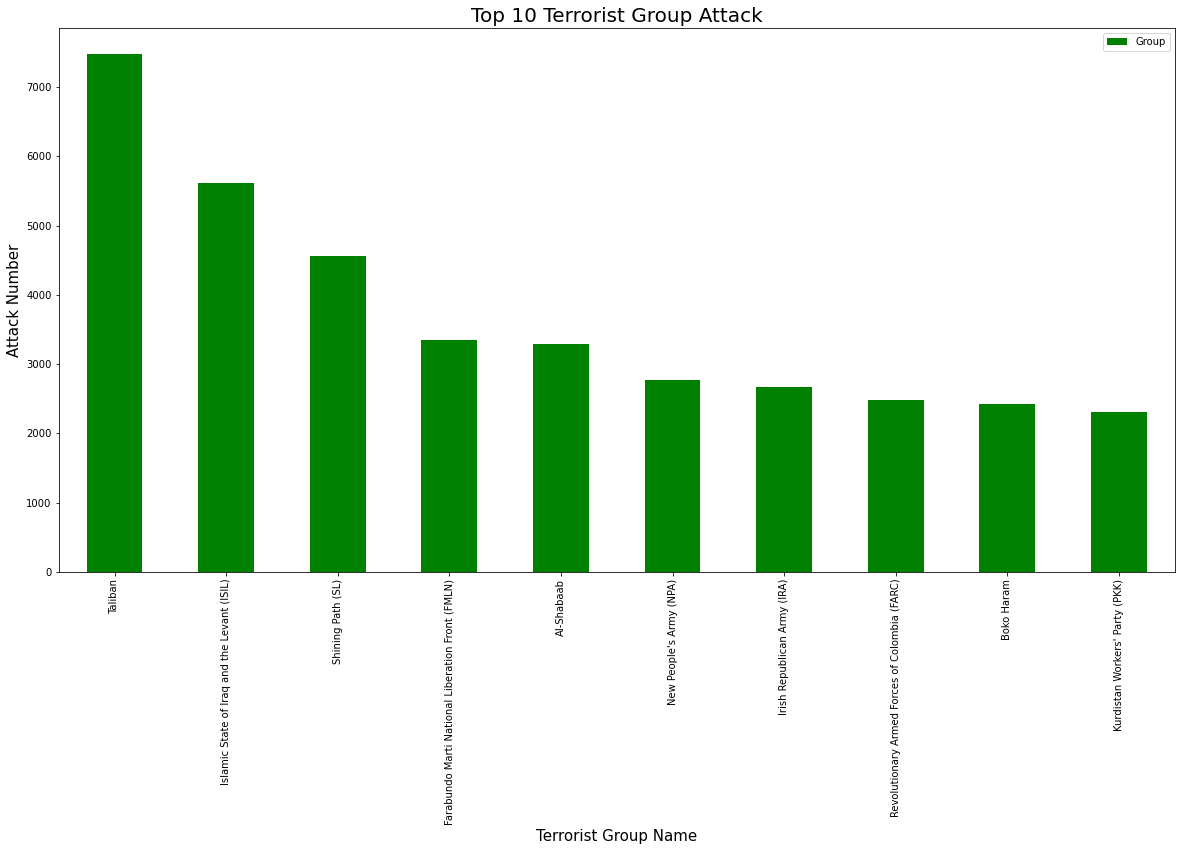

In [19]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind = 'bar' , figsize = (20,10) , color = 'Green')
plt.xlabel('Terrorist Group Name' , fontsize = 15)
plt.ylabel('Attack Number' , fontsize = 15)
plt.title('Top 10 Terrorist Group Attack' , fontsize = 20)
plt.show()

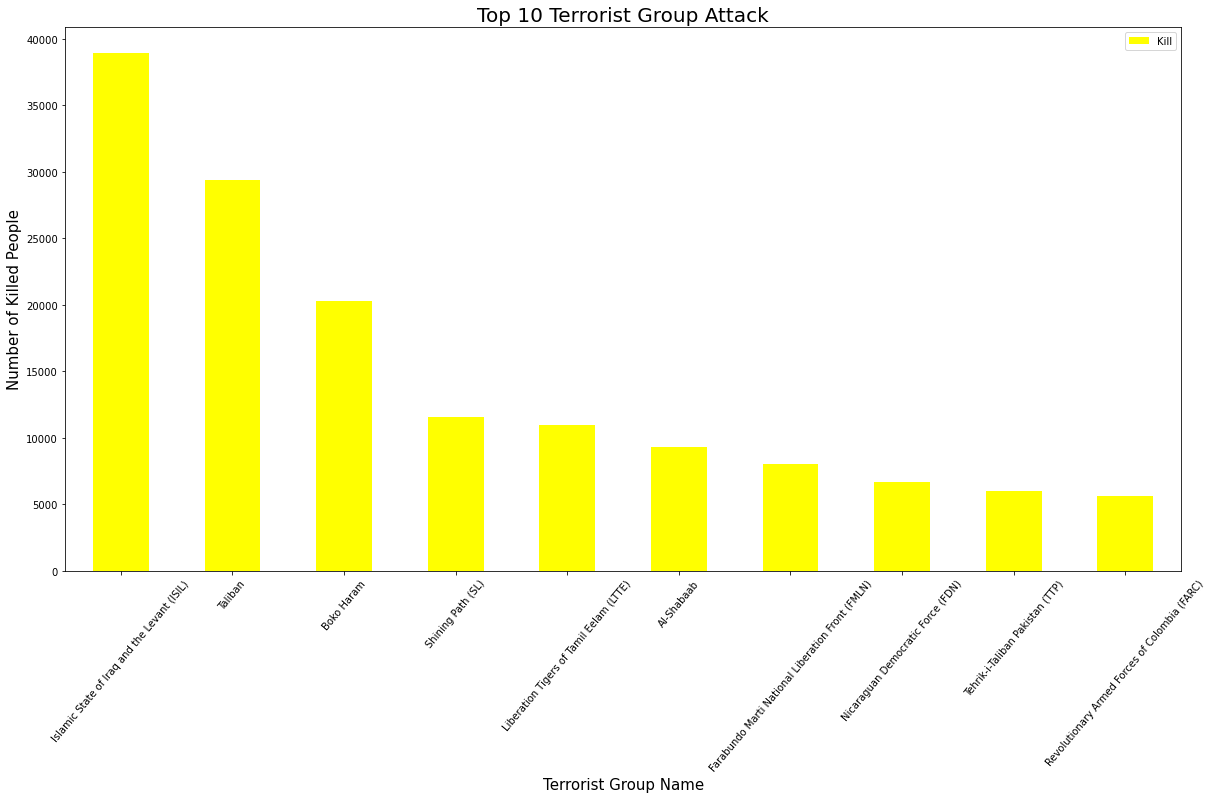

In [20]:
data[['Group' , 'Kill']].groupby(['Group'] , axis = 0).sum().drop('Unknown').sort_values('Kill' , ascending = False).head(10).plot(kind = 'bar' , color = 'Yellow' , figsize = (20,10) )
plt.xticks(rotation = 50)
plt.xlabel('Terrorist Group Name' , fontsize = 15)
plt.ylabel('Number of Killed People' , fontsize = 15)
plt.title('Top 10 Terrorist Group Attack' , fontsize = 20)
plt.show()